# The Sparks Foundation

Type: Perform Exploratory Analysis on a Terrorism Dataset

Task 4: As a security analysit try to find out the hot zones of terrorist activities

Author: Sahil Purohit

Language: Python

Source: Google Colab

1. Importing the gdrive

In [30]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


2. Importing the Libraries

In [31]:
import pandas as pd  # manipulation of raw data
import numpy as np   # mathematical calculations
import matplotlib.pyplot as plt   # plotting graphs
import seaborn as sns
%matplotlib inline

3. Importing the Dataset

In [32]:
data=pd.read_csv('/gdrive/My Drive/Sparks Foundation/Data Set/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4. Checking the total number of rows and columns in the dataset

In [33]:
data.shape

(181691, 135)

In [34]:
col= []
for j in data.columns:
    if data[j].isnull().sum()>150000:
        col.append(j)

5. Dropping the unwanted columns

In [35]:
data=data.drop(col,axis=1)

6. Checking the shape of the updated dataset

In [36]:
data.shape

(181691, 67)

7. Filling the missing values or n.a values in the dataset with 0

In [37]:
data.fillna(0,inplace=True)

In [38]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

8. Finding the countries with most terrorist activities

In [39]:
countries_terrorism=data.country_txt.value_counts().head(15)
countries = list(countries_terrorism.index)

In [40]:
countries

['Iraq',
 'Pakistan',
 'Afghanistan',
 'India',
 'Colombia',
 'Philippines',
 'Peru',
 'El Salvador',
 'United Kingdom',
 'Turkey',
 'Somalia',
 'Nigeria',
 'Thailand',
 'Yemen',
 'Spain']

Text(0.5, 1.0, 'Countries with most Terrorist Activities')

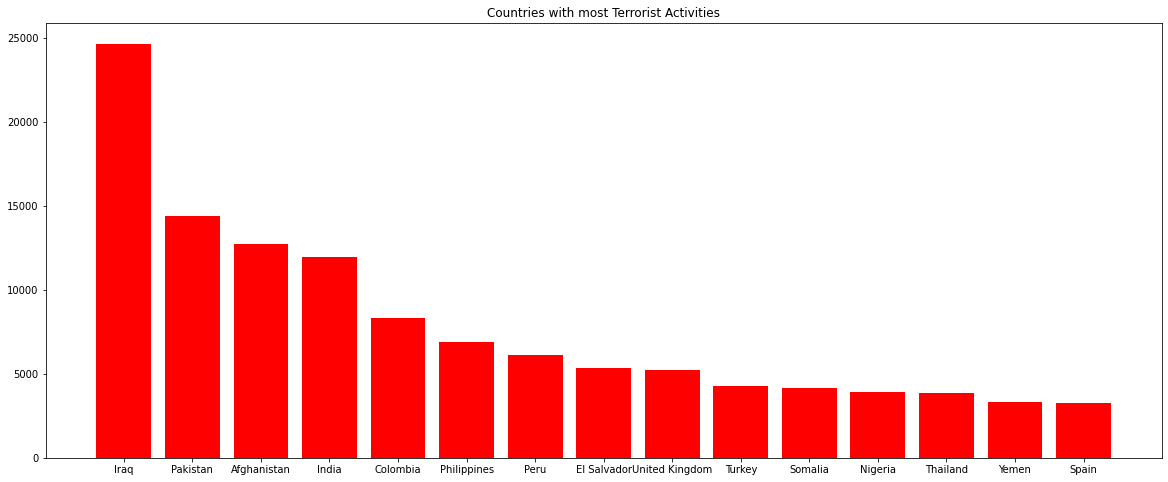

In [41]:
# Plotting a graph of the countries

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(countries_terrorism.index,countries_terrorism.values,color="red")
plt.title('Countries with most Terrorist Activities')

From the above graph we can see that Iran is the country where most terrorist activities are happening 

In [42]:
data = data[data['country_txt'].isin(countries)]

In [43]:
# Printing the names of the columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [44]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
26,197001210001,1970,1,21,0,160,Philippines,5,Southeast Asia,Metropolitan Manila,Quezon City,14.674280,121.057495,1.0,0,0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,0,JUSMAG HQ,217.0,United States,Unknown,0,0.0,0,0.0,0.0,0.0,6,Explosives,15.0,Vehicle,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),5000.0,0,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
39,197001310001,1970,1,31,0,160,Philippines,5,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,1.0,0,0,0,1,1,0,1.0,0.0,0,0,9,Unknown,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",U.S. Navy,Seaman,217.0,United States,New People's Army (NPA),0,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,PGIS,0,1,1,1
96,197003000001,1970,3,0,0,160,Philippines,5,Southeast Asia,Metropolitian Manila,Manila,14.596051,120.978666,1.0,0,0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Embassy,217.0,United States,Unknown,0,0.0,0,0.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),500.0,0,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
103,197003030001,1970,3,3,0,185,Spain,8,Western Europe,Unknown,Unknown,0.000000,0.000000,5.0,0,0,0,1,1,1,0.0,0.0,0,0,6,Hostage Taking (Kidnapping),2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Spanish Govt.,"Garrigues, permanent spanish delegaet to Unesco",185.0,Spain,1st of May Group,0,0.0,0,3.0,0.0,0.0,13,Unknown,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,1.0,1.0,0,0,0,PGIS,0,1,0,1


In [45]:
data.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181685,201712310020,2017,12,31,0,4,Afghanistan,6,South Asia,Faryab,Maymana,35.921051,64.774544,1.0,0,0,12/31/2017: An explosive device detonated at a...,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,7.0,Retail/Grocery/Bakery,Unknown,Jewelry Shop,4.0,Afghanistan,Unknown,0,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,0,0.0,0.0,0.0,4.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A shop was damaged in this attack.,0.0,0.0,"""4 people injured in Farayb explosion,"" Pajhwo...",0,0,START Primary Collection,-9,-9,0,-9
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,0,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,0,0.0,0,0.0,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,0.0,0,-99.0,0.0,0.0,8,Incendiary,18.0,Arson/Fire,0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",0,0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0,India,Unknown,0,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,0.0,0,0.0,0,0.0,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",0,0,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,0,12/31/2017: An explosive device was discovered...,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,0.0,0,Unknown,Unknown,160.0,Philippines,Unknown,0,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",0,START Primary Collection,-9,-9,0,-9


9. Finding the years where most terrorist activities took place

In [29]:
data.iyear.value_counts().head(15)

2014    12581
2016    10249
2015    10208
2013     9783
2017     8192
2012     7317
2011     4389
2010     4076
2009     3893
2008     3610
1991     2930
2007     2473
1989     2454
1992     2431
1990     2263
Name: iyear, dtype: int64

Text(0.5, 1.0, 'The Years with the most number of Terrorist Activities')

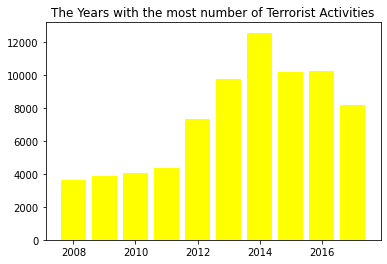

In [47]:
# Plotting the graph of the above data

year = data.iyear.value_counts().head(10)
plt.bar(year.index,year.values,color='yellow')
plt.title("The Years with the most number of Terrorist Activities")

From the above graph we can see that 2014 was the year in hich most of the terrorist activities took place

10. Finding the common targets of all the terrorist activities

Text(0.5, 1.0, 'Differnt types of Targets')

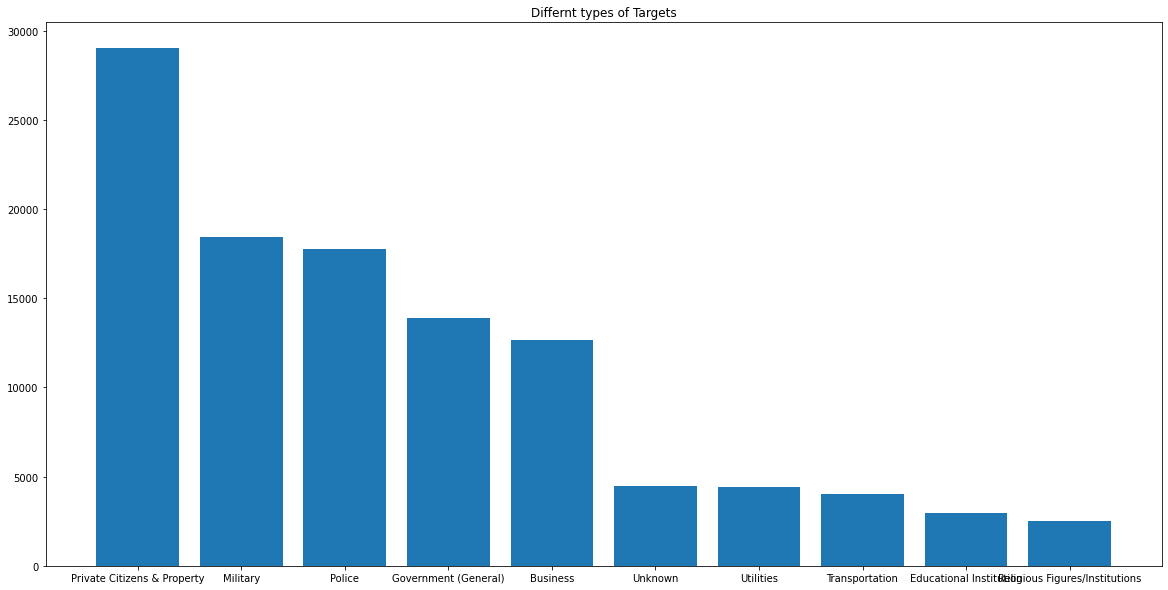

In [54]:
target = data['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(target.index,target.values)
plt.title('Differnt types of Targets')

Form the above graph we can see that the citizens of the countries and the private properties were targeted the most

11. Finding the different types of weapons which were used

Text(0.5, 1.0, 'Different types of weapons used')

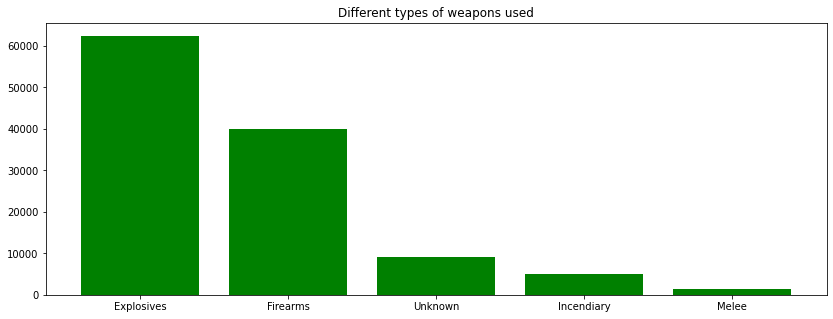

In [58]:
weapon = data['weaptype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(weapon.index,weapon.values,color='green')
plt.title('Different types of weapons used')

From the above graph we can see that mostly the explosives were used as weapons